In [8]:
import numpy as np
import pandas as pd

In [9]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.float_format","{:.5f}".format)

In [59]:
df=pd.read_csv("Titanic-Dataset.csv")

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [60]:
df['Age'].fillna(df["Age"].mean(),inplace=True)

In [62]:
df["Embarked"].fillna(df["Embarked"].mode(),inplace=True)

In [63]:
#drop cabin-- too many missing values even though it could be a crucial variable
df.drop("Cabin",axis=1,inplace=True)

In [64]:
# drop columns we dont need
df.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [65]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

# Decision Tree



From https://www.ibm.com/think/topics/decision-trees
Entropy values can fall between 0 and 1. If all samples in data set, S, belong to one class, then entropy will equal zero. If half of the samples are classified as one class and the other half are in another class, entropy will be at its highest at 1. In order to select the best feature to split on and find the optimal decision tree, the attribute with the smallest amount of entropy should be used.

Information gain represents the difference in entropy before and after a split on a given attribute. The attribute with the highest information gain will produce the best split as it’s doing the best job at classifying the training data according to its target classification

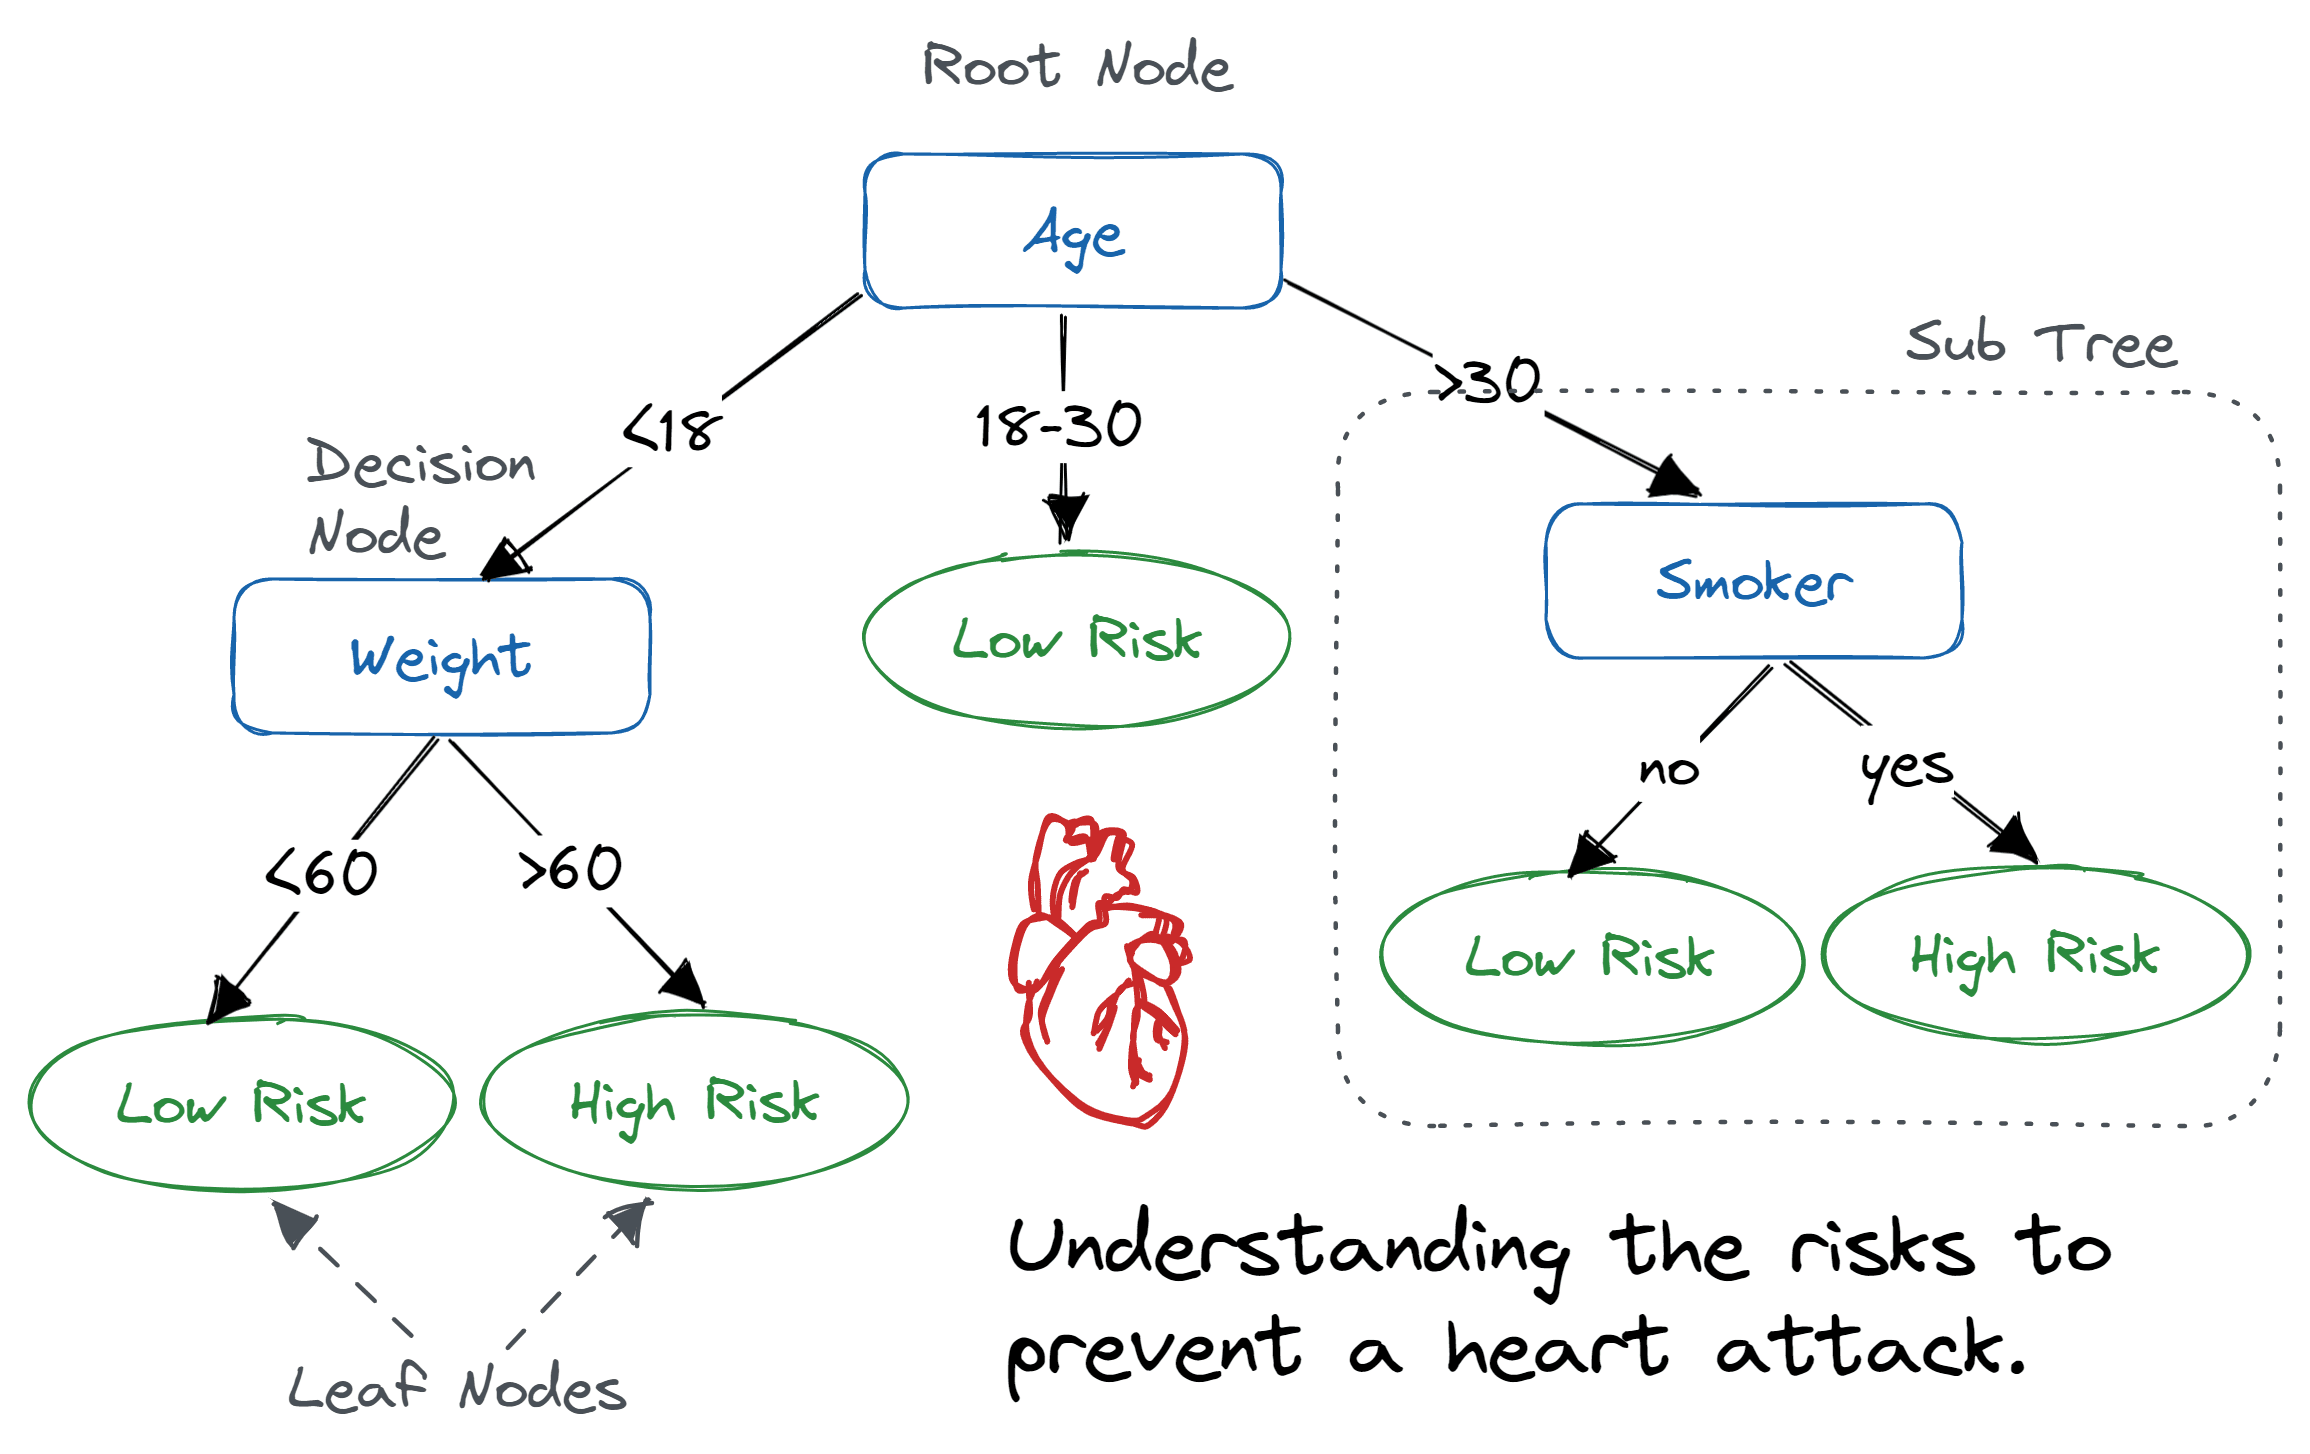

Image from https://www.datacamp.com/tutorial/decision-tree-classification-python


In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X_dummies=pd.get_dummies(df[['Pclass', 'Sex',"Embarked"]],columns=['Pclass', 'Sex',"Embarked"])


,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,False,False,True,False,True,False,False,True
1,True,False,False,True,False,True,False,False
2,False,False,True,True,False,False,False,True
3,True,False,False,True,False,False,False,True
4,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...
886,False,True,False,False,True,False,False,True
887,True,False,False,True,False,False,False,True
888,False,False,True,True,False,False,False,True
889,True,False,False,False,True,True,False,False


In [131]:
X=df.drop(['Pclass', 'Sex',"Embarked","Survived"],axis=1)
X=pd.concat([X,X_dummies],axis=1)

In [132]:
y=df["Survived"]

In [133]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [153]:
model=DecisionTreeClassifier(max_depth=3)

In [154]:
X

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.00000,1,0,7.25000,False,False,True,False,True,False,False,True
1,38.00000,1,0,71.28330,True,False,False,True,False,True,False,False
2,26.00000,0,0,7.92500,False,False,True,True,False,False,False,True
3,35.00000,1,0,53.10000,True,False,False,True,False,False,False,True
4,35.00000,0,0,8.05000,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.00000,0,0,13.00000,False,True,False,False,True,False,False,True
887,19.00000,0,0,30.00000,True,False,False,True,False,False,False,True
888,29.69912,1,2,23.45000,False,False,True,True,False,False,False,True
889,26.00000,0,0,30.00000,True,False,False,False,True,True,False,False


In [155]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [156]:
y_pred=model.predict(X_test)

In [157]:
from sklearn.metrics import accuracy_score

In [158]:
accuracy_score(y_test,y_pred)

0.8116591928251121

In [159]:
X

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.00000,1,0,7.25000,False,False,True,False,True,False,False,True
1,38.00000,1,0,71.28330,True,False,False,True,False,True,False,False
2,26.00000,0,0,7.92500,False,False,True,True,False,False,False,True
3,35.00000,1,0,53.10000,True,False,False,True,False,False,False,True
4,35.00000,0,0,8.05000,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.00000,0,0,13.00000,False,True,False,False,True,False,False,True
887,19.00000,0,0,30.00000,True,False,False,True,False,False,False,True
888,29.69912,1,2,23.45000,False,False,True,True,False,False,False,True
889,26.00000,0,0,30.00000,True,False,False,False,True,True,False,False


In [160]:
from sklearn.tree import  plot_tree
import matplotlib.pyplot as plt

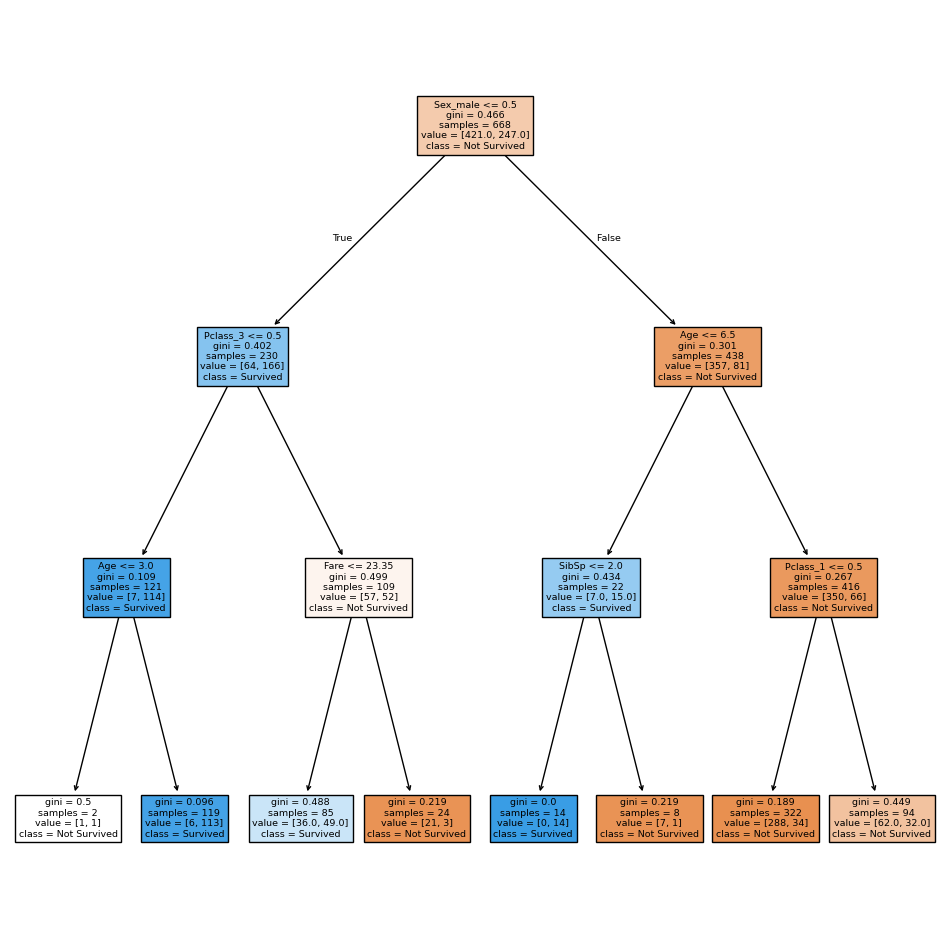

In [161]:
plt.figure(figsize=(12, 12))
plot_tree(model, filled=True, feature_names=X.columns,class_names=["Not Survived", "Survived"])
plt.show()